In [1]:
import requests
import time
import os
import sys
import re
import io
import json
import csv
import openpyxl
import pandas as pd
import numpy as np
import kss
import ast
from pykospacing import spacing
from konlpy.tag import Komoran

In [3]:
#각 키워드에 해당하는 내용 정리
#예시: ['결혼', '남자', '남편', '본인', '부모', '시간', '엄마', '여자', '자기', '친구']
from IPython.core.display import display, HTML
from konlpy.tag import Okt

#키워드에 해당하는 제목, 본문, 댓글 출력, 추후 iteration 돌며 10가지 모두 할 것
key = '결혼'

final = pd.DataFrame(columns = ['contents'])

f = pd.read_csv('natepann.csv')

is_key = f['본문'].str.contains(key, na=False)

f_key = f[is_key]
f_key = f_key.reset_index()
f_key

,index,제목,본문,댓글
0,0,너네엄 마라고 하는 시 어머니,어느 순간부터 시 어머니가 친 정 엄마를 지칭해서 말 할 때 너네엄 마라고 하더라고...,으이그 진짜 무식 한 여편 네 어른한테 이런 표현 하기 싫지만 대우해 주고 싶지 않...
1,1,임신에 대한 친정과 시댁의 온도차,추가 어젯밤에 서운한 맘에 글 써놓고 오늘은 남편 하고 남편 친구하고 도련님 셋이 ...,재미도 없고 마지막 줄 진짜 인성 나오네 주 작 오지네 임신 초기에 회 절대 못 먹...
2,2,예비 신랑 탈모 때문에 너무 고민입니다,안녕하세 요저는 예랑이와 년 정도 연애 하고 몇 번의 헤어짐을 겪고 결혼 약속을 하...,하루 빨리 약 복용하시길 추천 드립니다 약 먹는 순간부터 현 머리 상태가 유지된다고...
3,5,회계사 시험 붙더니 헤어지자는 남자친구,근 년간을 남자친구 뒷바라지하고 많이 챙겨줬었는데 요 저희끼리 서로 결혼은 언제 할...,이런 사람도 있고 저런 넘도 있을 텐데 글쓴이에게는 저런 넘이 걸렸네요 사람도 봐가...
4,7,엄마가 필리핀 사람이라 비혼주의가 됐어요,부모님을 창피해하고 싶지는 않지만 아버지는 농부시고 어머니는 필리핀 분이세요가난한 ...,아이는 죄가 없지 부모가 선택했을 뿐 아이가 선택한 건 무엇도 없으니까 근데 나는 ...
5,9,시댁 문제로 남편과 심각하게 싸웠어요,안녕하세요 제가 남편이랑 크게 부부싸움을 했는데 제 생각이 잘못된 건지 진짜 의견 ...,다른 건 모르겠구요 일단 부부 싸움에 부모님 소환은 안 좋은 신호 맞아요 약간 저희...
6,12,예비 시동생 과거 파혼 결혼,안녕하세요 년차 연애 후 결혼 진행 중에 있는 예신이에 요 주변에 말하면 결코 축복...,나도 같은 급이에요 라고 말하고 싶은 건가님이랑 님네 집안도 그렇게 수준 떨어지는 ...
7,15,힘든 결혼생활,연애 년 결혼 년이며 이제 년차 접어드는 커플인 부부입니 다년이라는 연 기간 동안 ...,진짜인가요 이게 모두 너무 충격의 충격의 충격의 충격인데요 그리고 지금 몇 살이 신...
8,20,대 남자 결혼 상대로 어떤지 봐주세요,대 남자 소개할게요나이 배는 나왔는데 팔 근육 있습니다 그냥 그런 평범한 회사 다닙...,결정사에 등록 해보세요서른에 모솔 에 키로도 과 체중인데 에 그와중애 취미가 게임 ...
9,26,이혼 후 재결합 해보신분 있으실까요,안녕하세요살 이 혼녀입니다 예전에도 글을 쓴 적이 있는데 그때 참 많은 도움을 받은...,자기 인생 꼬는 사람들 심리가 이렇구나 써 논 글 다시 읽어봐요 얼마나 힘들었음 이...


In [4]:
final_key = pd.DataFrame(columns = ['tokenized'])
komoran = Komoran()

for i in range(len(f_key)):
    try:
        st = f_key.loc[i, '제목']
        final_key.loc[i, 'tokenized'] = st
        ct = f_key.loc[i, '본문']
        final_key.loc[i, 'tokenized'] += ct
        cm = f_key.loc[i, '댓글']
        final_key.loc[i, 'tokenized'] += cm
    
    except KeyError:
        print("error")

keyword_content = pd.DataFrame(columns = ['content','positive', 'negative', 'neutral'])


for i in range(len(final_key)):
    try:
        fc = final_key.loc[i, 'tokenized']#.replace(" ", "")
        fc = spacing(fc)
        #fc = str(komoran.morphs(fc))
        
        if i == 0:
            keyword_content.loc[0,'content'] = fc
        else:
            keyword_content.loc[0,'content'] += fc
        
    except KeyError:
        print("error")

keyword_content

,content,positive,negative,neutral
0,너네엄 마라고 하는 시 어머니 어느 순간부터 시 어머니가 친 정 엄마를 지칭해서 말...,NaN,NaN,NaN


In [5]:
# 감성사전에서 감성분석
f = open('SentiWord_Dict.txt', 'r', -1, 'utf-8')
lines = f.readlines()

score_dict = []

for line in lines:
    line_splited = line.split()
    score = int(line_splited[-1])
    word = ''
    for frac in line_splited[:-1]:
        word = word + ' ' + frac
    
    word = word[1:]
    score_dict.append([word, score])

In [6]:
#keys = []

keyword_content['positive'] = 0
keyword_content['negative'] = 0
keyword_content['neutral'] = 0

#komoran = Komoran()
#keys = spacing(keyword_content.loc[0, 'content'])
#keys = = str(komoran.nouns(keys)

#keyword_content.loc[0, 'content'] = spacing(keyword_content.loc[0, 'content'])
keyword_content.loc[0, 'content'] = str(komoran.nouns(keyword_content.loc[0, 'content']))


stopwords = ['하다', '없다', '있다', '되다', '아니다', '같다', '이다', '않다', '그렇다', 
             '이렇다', '싶다', '다', '것', '그', '이', '거', '니다']


pos_list = ast.literal_eval(keyword_content.loc[0, 'content'])
    
final = []
    
for j in range(len(pos_list)):
    if pos_list[j] not in stopwords:
        final.append(pos_list[j])
    
keyword_content.loc[0, 'content'] = str(final)
#keys = str(final)

In [7]:
keyword_content.insert(0, "Keyword", key)

In [8]:
keyword_content.head()

,Keyword,content,positive,negative,neutral
0,결혼,"['엄', '시', '어머니', '순간', '시', '어머니', '정', '엄마',...",0,0,0


In [9]:
#tokens.append(keyword_content.loc[0, 'content'])
#tokens.extend(keys)

tokens = ast.literal_eval(keyword_content.loc[0, 'content'])

try:
    for token in tokens:
        for dict_word in score_dict:
            if dict_word[0] == token:
                if dict_word[1] > 0:
                    keyword_content.loc[0, 'positive'] += dict_word[1]
                elif dict_word[1] < 0:
                    keyword_content.loc[0, 'negative'] += dict_word[1]
                else:
                    keyword_content.loc[0, 'neutral'] += 1 #중립어는 개수 세기    
except KeyError:
    print("error")

In [10]:
keyword_content[keyword_content.columns.difference(['content'])]

,Keyword,negative,neutral,positive
0,결혼,-397,13,293


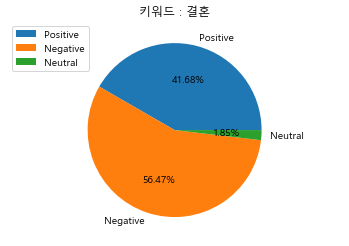

In [28]:
#% 시각화
import matplotlib.pyplot as plt
pos = keyword_content.loc[0, 'positive']
neg = str(keyword_content.loc[0, 'negative']).replace("-", "")
neu = keyword_content.loc[0, 'neutral']

size = [pos, neg, neu]

label = ['Positive','Negative','Neutral']

plt.axis('equal')
plt.pie(x=size, labels=label, autopct='%.2f%%')

plt.title("키워드 : " + key)
plt.legend()
plt.show()